In [1]:
import sqlite3

conn = sqlite3.connect('supermarket_sales.db')

conn.execute("""
             CREATE TABLE supermarket_sales (
    Invoice_ID TEXT PRIMARY KEY,
    Branch TEXT NOT NULL,
    City TEXT NOT NULL,
    Customer_type TEXT NOT NULL,
    Gender TEXT NOT NULL,
    Product_line TEXT NOT NULL,
    Unit_price REAL NOT NULL,
    Quantity INTEGER NOT NULL,
    Tax_5 REAL NOT NULL,
    Total REAL NOT NULL,
    Date TEXT NOT NULL,
    Time TEXT NOT NULL,
    Payment TEXT NOT NULL,
    cogs REAL NOT NULL,
    gross_margin_percentage REAL NOT NULL,
    gross_income REAL NOT NULL,
    Rating REAL NOT NULL
);
             """)

conn.commit()

conn.close()

Lendo a base de dados csv para appendar os dados na tabela

In [9]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')
df.rename(columns={'Invoice ID': 'Invoice_ID', 
                   'Customer type': 'Customer_type', 
                   'Product line': 'Product_line', 
                   'Total': 'Total',
                   'Tax 5%': 'Tax_5', 
                   'cogs': 'cogs', 
                   'gross margin percentage': 
                       'gross_margin_percentage', 
                       'gross income': 'gross_income',
                       'Rating': 'Rating',
                       'Unit price': 'Unit_price'}, inplace=True)
conn = sqlite3.connect('supermarket_sales.db')

df.to_sql('supermarket_sales', conn, if_exists='append', index=False)

conn.commit()

conn.close()

In [31]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')
df.rename(columns={'Invoice ID': 'Invoice_ID', 
                   'Customer type': 'Customer_type', 
                   'Product line': 'Product_line', 
                   'Total': 'Total',
                   'Tax 5%': 'Tax_5', 
                   'cogs': 'cogs', 
                   'gross margin percentage': 
                       'gross_margin_percentage', 
                       'gross income': 'gross_income',
                       'Rating': 'Rating',
                       'Unit price': 'Unit_price'}, inplace=True)
df['cost'] = df['Unit_price'] - df['gross_income']

# Converte a coluna Date para datetime (caso não esteja ainda).
df['Date'] = pd.to_datetime(df['Date'])


# Define a data de corte para filtrar os últimos 'months' meses
cutoff_date = df['Date'].max() - pd.DateOffset(months=3)

# Filtra somente as vendas nesse período
df_filtrado = df[df['Date'] >= cutoff_date].copy()

# Ordena por Product_line e depois por Unit_price
df_filtrado.sort_values(by=["Product_line", "Unit_price"], ascending=False, inplace=True)


In [32]:
df_filtrado.query('Product_line == "Electronic accessories"')

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,cost
209,817-69-8206,B,Mandalay,Normal,Female,Electronic accessories,99.73,9,44.8785,942.4485,2019-03-02,19:42,Credit card,897.57,4.761905,44.8785,6.5,54.8515
656,250-81-7186,C,Naypyitaw,Normal,Female,Electronic accessories,99.69,1,4.9845,104.6745,2019-02-27,10:23,Credit card,99.69,4.761905,4.9845,8.0,94.7055
120,638-60-7125,A,Yangon,Normal,Female,Electronic accessories,99.56,8,39.8240,836.3040,2019-02-14,17:03,Credit card,796.48,4.761905,39.8240,5.2,59.7360
513,189-52-0236,A,Yangon,Normal,Male,Electronic accessories,99.55,7,34.8425,731.6925,2019-03-14,12:07,Cash,696.85,4.761905,34.8425,7.6,64.7075
469,233-34-0817,C,Naypyitaw,Member,Female,Electronic accessories,98.84,1,4.9420,103.7820,2019-02-15,11:21,Cash,98.84,4.761905,4.9420,8.4,93.8980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,273-84-2164,C,Naypyitaw,Member,Male,Electronic accessories,12.05,5,3.0125,63.2625,2019-02-16,15:53,Ewallet,60.25,4.761905,3.0125,5.5,9.0375
717,482-17-1179,A,Yangon,Member,Male,Electronic accessories,11.94,3,1.7910,37.6110,2019-01-19,12:47,Credit card,35.82,4.761905,1.7910,8.1,10.1490
222,389-25-3394,C,Naypyitaw,Normal,Male,Electronic accessories,11.81,5,2.9525,62.0025,2019-02-17,18:06,Cash,59.05,4.761905,2.9525,9.4,8.8575
231,545-46-3100,B,Mandalay,Member,Female,Electronic accessories,10.59,3,1.5885,33.3585,2019-03-12,13:52,Credit card,31.77,4.761905,1.5885,8.7,9.0015


In [33]:
# Calcula a quantidade cumulativa (cumsum) por Product_line
df_filtrado["qtd_cumsum"] = df_filtrado.groupby("Product_line")["Quantity"].cumsum()
df_filtrado.query('Product_line == "Electronic accessories"')[['Unit_price', 'Quantity', 'qtd_cumsum']]

,Unit_price,Quantity,qtd_cumsum
209,99.73,9,9
656,99.69,1,10
120,99.56,8,18
513,99.55,7,25
469,98.84,1,26
...,...,...,...
644,12.05,5,952
717,11.94,3,955
222,11.81,5,960
231,10.59,3,963


In [77]:

# Calcula a quantidade cumulativa (cumsum) por Product_line
df_filtrado["qtd_cumsum"] = df_filtrado.groupby("Product_line")["Quantity"].cumsum()

# Agora agrupamos por Product_line e Unit_price
df_grouped = df_filtrado.groupby(["Product_line", "Unit_price"], as_index=False).agg(
    qtd_cumsum=("qtd_cumsum", "last"),    # Pega o último valor da coluna qtd_cumsum
)

df_cost = df.groupby(['Product_line'], as_index=False)['cost'].last()

df_grouped = df_grouped.merge(df_cost, how='left')


df_grouped['profit'] = df_grouped['Unit_price']-df_grouped['cost']

# Nova coluna: valor_novo = qtd_cumsum * custo_medio (exemplo)
df_grouped["valor_novo"] = df_grouped["qtd_cumsum"] * df_grouped["profit"]

In [78]:
df_grouped.query('Product_line == "Electronic accessories"')

,Product_line,Unit_price,qtd_cumsum,cost,profit,valor_novo
0,Electronic accessories,10.56,971,57.9025,-47.3425,-45969.5675
1,Electronic accessories,10.59,963,57.9025,-47.3125,-45561.9375
2,Electronic accessories,11.81,960,57.9025,-46.0925,-44248.8000
3,Electronic accessories,11.94,955,57.9025,-45.9625,-43894.1875
4,Electronic accessories,12.05,952,57.9025,-45.8525,-43651.5800
...,...,...,...,...,...,...
163,Electronic accessories,98.84,26,57.9025,40.9375,1064.3750
164,Electronic accessories,99.55,25,57.9025,41.6475,1041.1875
165,Electronic accessories,99.56,18,57.9025,41.6575,749.8350
166,Electronic accessories,99.69,10,57.9025,41.7875,417.8750


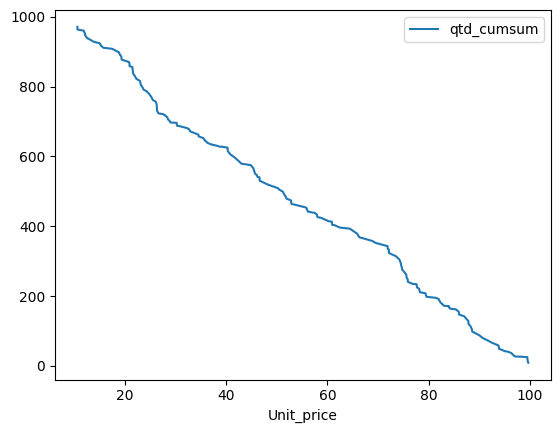

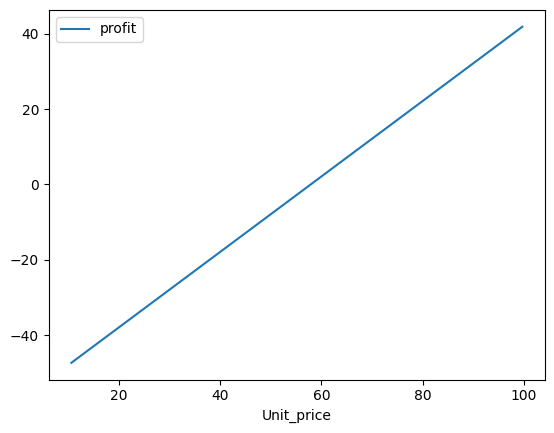

In [80]:
import matplotlib.pyplot as plt
df_grouped.query('Product_line == "Electronic accessories"').plot(x='Unit_price',y='qtd_cumsum',)
df_grouped.query('Product_line == "Electronic accessories"').plot(x='Unit_price',y='profit')
plt.show()

In [82]:
idx = df_grouped.groupby('Product_line')['valor_novo'].idxmax()

In [83]:
    df_grouped.loc[idx]

,Product_line,Unit_price,qtd_cumsum,cost,profit,valor_novo
116,Electronic accessories,74.22,305,57.9025,16.3175,4976.8375
300,Fashion accessories,81.31,218,57.4210,23.8890,5207.8020
459,Food and beverages,72.39,351,30.2480,42.1420,14791.8420
615,Health and beauty,68.55,316,38.3325,30.2175,9548.7300
805,Home and lifestyle,88.39,168,62.5290,25.8610,4344.6480
928,Sports and travel,69.12,361,38.3000,30.8200,11126.0200
